# Visualização de dados com Seaborn

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Bibliotecas básicas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Carregando os dados

In [3]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alura/tips.csv')
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [4]:
dados.shape

(244, 6)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   dessert     244 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    object 
 5   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


### Dicionário dos dados

1. **total_bill**: total da conta
2. **tip**: gorjeta
3. **dessert**: pediu sobremesa ou não
4. **day**: dia da semana
5. **time**: hora do almoço ou jantar
6. **size**: total de pessoas na mesa




### Traduzindo colunas e campos

In [6]:
dados = dados.rename(columns={'total_bill': 'valor_da_conta', 
                      'tip': 'gorjeta', 
                      'dessert': 'sobremesa', 
                      'day': 'dia_da_semana', 
                      'time': 'hora_do_dia', 
                      'size': 'total_de_pessoas'})
dados.head(2)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3


In [7]:
dados['sobremesa'] = dados['sobremesa'].map({'No': 'Não', 'Yes': 'Sim'})
dados['dia_da_semana'] = dados['dia_da_semana'].map({'Sun': 'Domingo', 'Sat': 'Sábado', 'Thur': 'Quinta', 'Fri': 'Sexta'})
dados['hora_do_dia'] = dados['hora_do_dia'].map({'Dinner': 'Jantar', 'Lunch': 'Almoço'})
dados.head(2)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3


### Visualização dos dados

In [8]:
!pip show seaborn

Name: seaborn
Version: 0.11.1
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, scipy, pandas, matplotlib
Required-by: missingno


#### O valor da conta influencia na gorgeta?

Visualmente, o valor da gorgeta aumenta conforme aumenta o valor da conta.

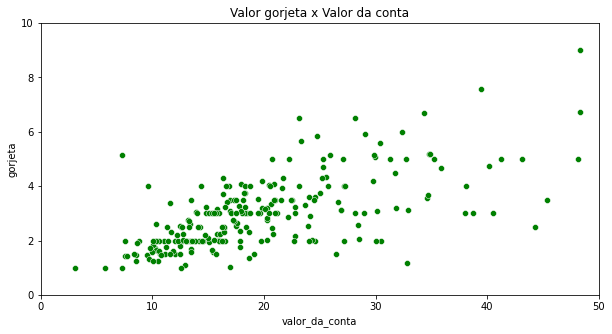

In [9]:
plt.figure(figsize=[10, 5])
sns.scatterplot(x='valor_da_conta', y='gorjeta', data=dados, color='green')
plt.title('Valor gorjeta x Valor da conta')
plt.xlim(0, 50)
plt.ylim(0, 10)
plt.show()

### O valor da conta é proporcional ao valor da gorgeta?

Visualmente, o valor da conta não é proporcional ao valor da gorgeta.

In [10]:
dados['porcentagem'] = round(dados['gorjeta'] / dados['valor_da_conta'], 2)
dados.head(2)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16


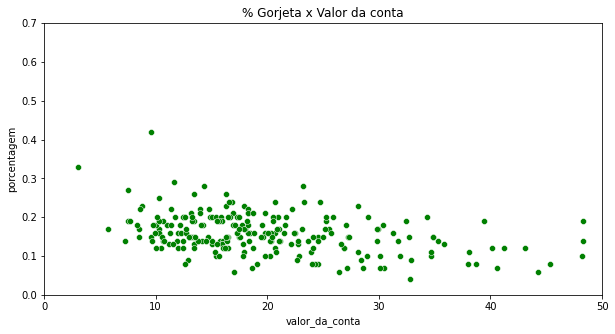

In [11]:
plt.figure(figsize=[10, 5])
sns.scatterplot(x='valor_da_conta', y='porcentagem', data=dados, color='green')
plt.title('% Gorjeta x Valor da conta')
plt.xlim(0, 50)
plt.ylim(0, 0.7)
plt.show()

### Relplot e Lmplot

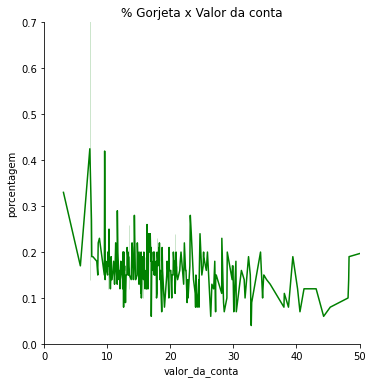

In [12]:
sns.relplot(x='valor_da_conta', y='porcentagem', data=dados, color='green', kind='line')
plt.title('% Gorjeta x Valor da conta')
plt.xlim(0, 50)
plt.ylim(0, 0.7)
plt.show()

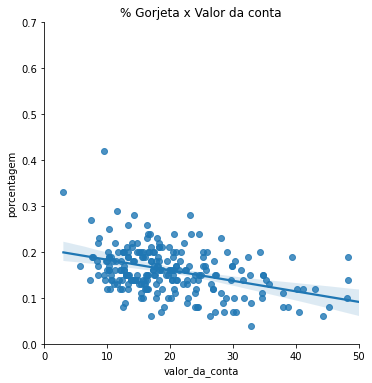

In [13]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=dados)
plt.title('% Gorjeta x Valor da conta')
plt.xlim(0, 50)
plt.ylim(0, 0.7)
plt.show()

### Sobremesa

Quem pede sobremesa dá mais gorgeta?

In [14]:
dados.query('sobremesa=="Sim"').describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [15]:
dados.query('sobremesa=="Não"').describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


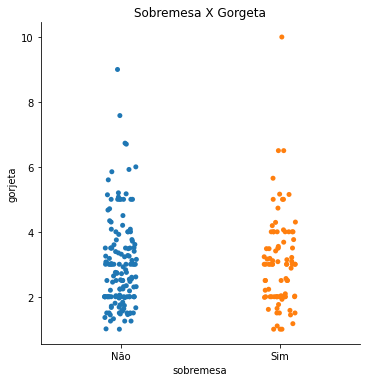

In [16]:
sns.catplot(x='sobremesa', y='gorjeta', data=dados)
plt.title('Sobremesa X Gorgeta')
plt.show()

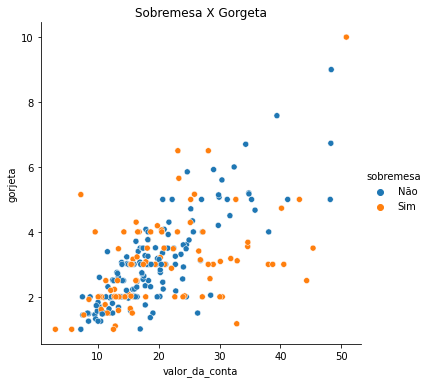

In [17]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=dados)
plt.title('Sobremesa X Gorgeta')
plt.show()

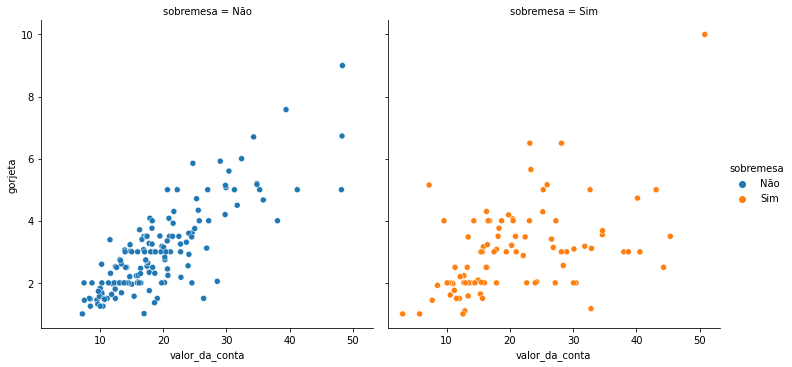

In [18]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=dados)
plt.show()

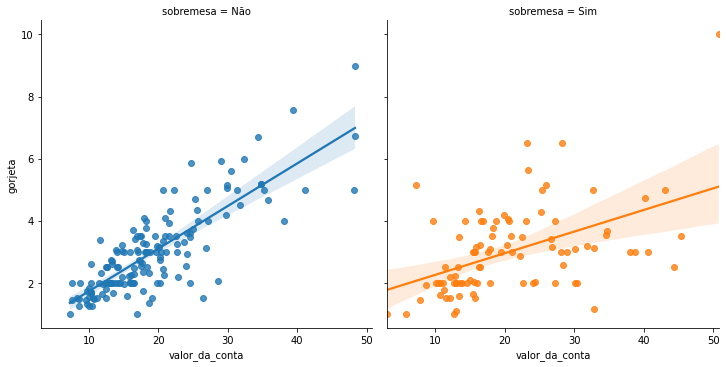

In [19]:
sns.lmplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=dados)
plt.show()

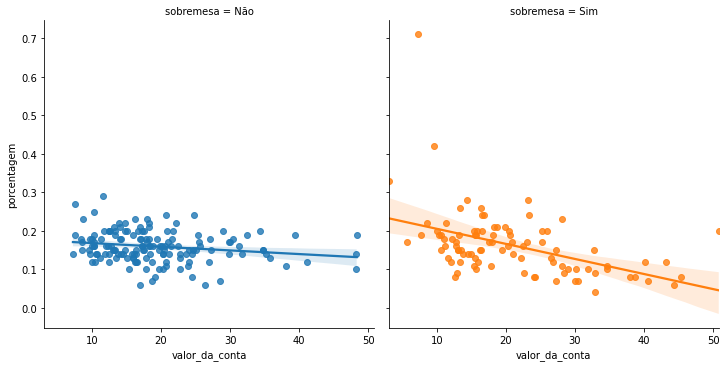

In [20]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='sobremesa', col='sobremesa', data=dados)
plt.show()

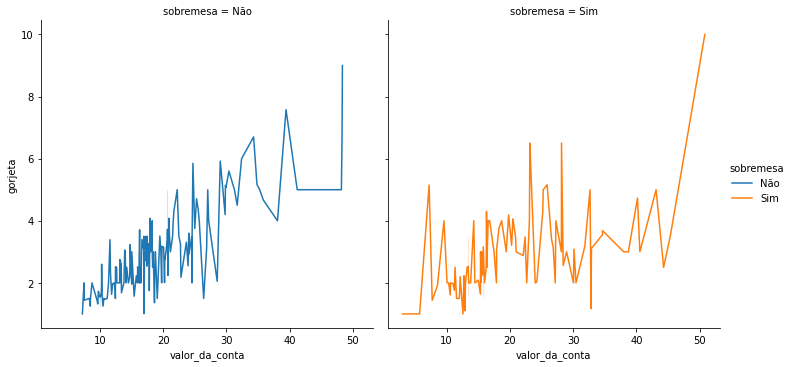

In [21]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', kind='line', data=dados)
plt.show()

Visualmente, existe uma diferença no valor da gorgeta entre aqueles que pediram e não pediram sobremesa.

### Teste de hipótese

**H<sup>0</sup>**: A distribuição da taxa de gorjeta é a mesma para os dois grupos.

**H<sup>1</sup>**: A distribuição da taxa de gorjeta não é a mesma para os dois grupos.

In [22]:
from scipy.stats import ranksums

sobremesa = dados.query('sobremesa=="Sim"').porcentagem
sem_sobremesa = dados.query('sobremesa=="Não"').porcentagem

stat_test, p_value = ranksums(sobremesa, sem_sobremesa)
print('P-valor: ', p_value)

P-valor:  0.5266635660124415


O p-valor representa que não temos evidências suficientes para aceitar a hipótese alternativa. Logo, conclui-se que a distribuição da taxa de gorjeta é a mesma para os dois grupos.

## Dia da semana

In [23]:
dados['dia_da_semana'].unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

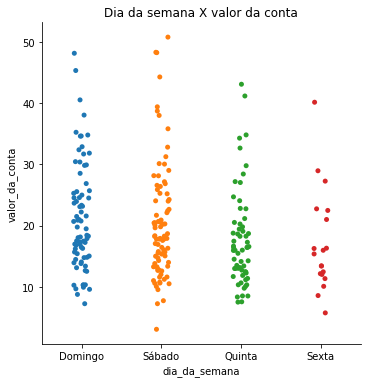

In [24]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=dados)
plt.title('Dia da semana X valor da conta')
plt.show()

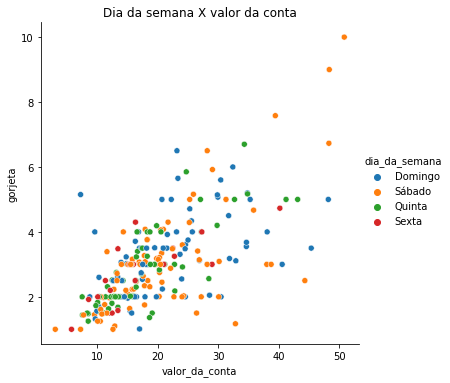

In [25]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=dados)
plt.title('Dia da semana X valor da conta')
plt.show()

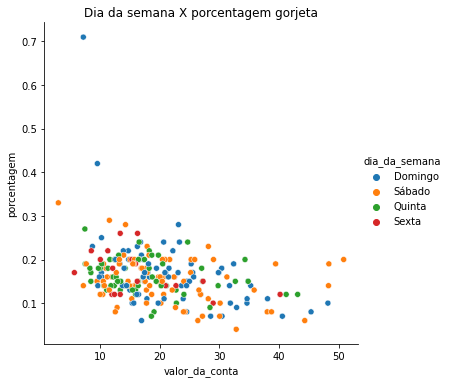

In [26]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=dados)
plt.title('Dia da semana X porcentagem gorjeta')
plt.show()

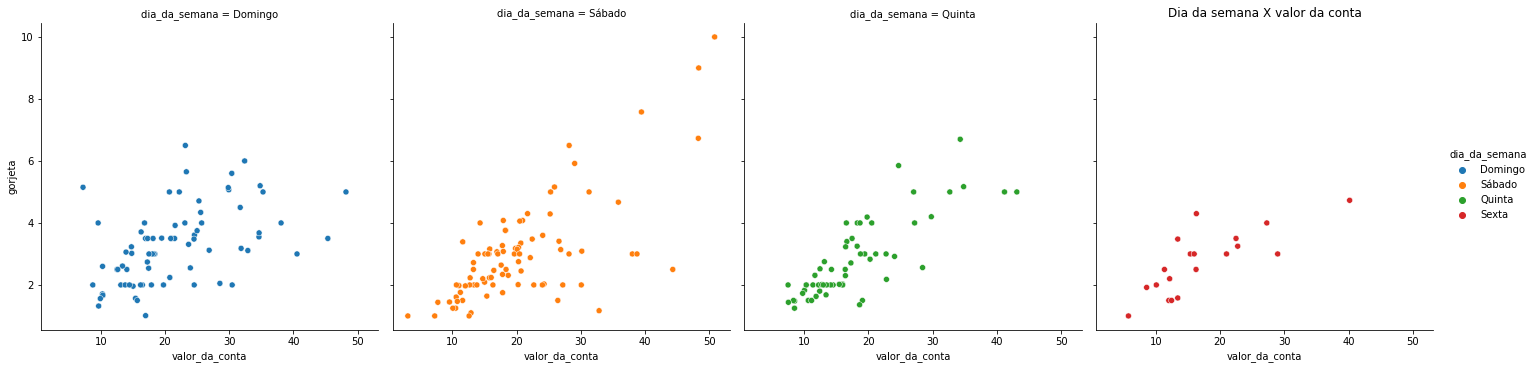

In [27]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col= 'dia_da_semana', data=dados)
plt.title('Dia da semana X valor da conta')
plt.show()

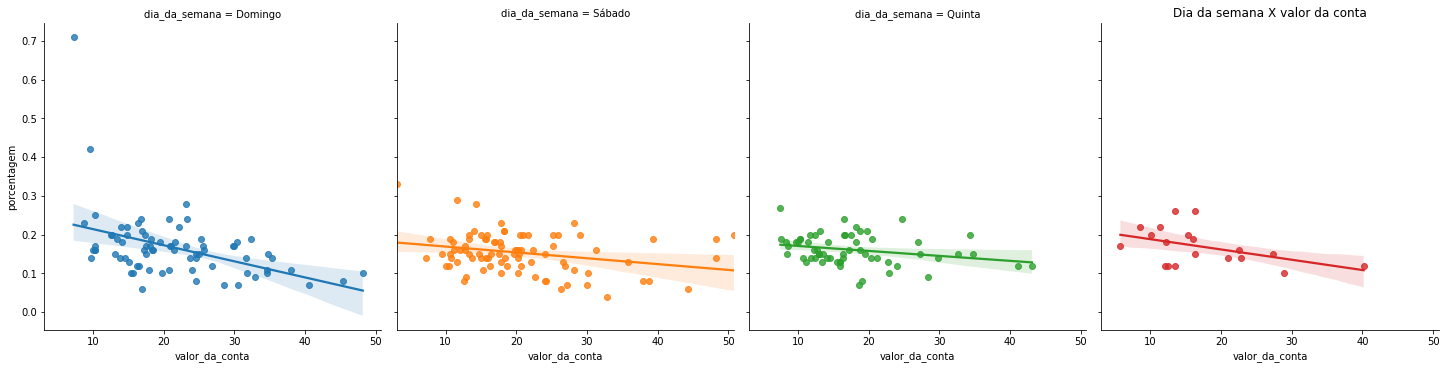

In [28]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col= 'dia_da_semana', data=dados)
plt.title('Dia da semana X valor da conta')
plt.show()

### Média geral das gorjetas

In [30]:
media_geral_gorjetas = dados['gorjeta'].mean()
media_geral_gorjetas

2.9982786885245902

In [32]:
dados.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [35]:
print('Frequência dos dias: ')
dados['dia_da_semana'].value_counts()

Frequência dos dias: 


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

### O valor da conta do domingo é diferente da conta do sábado?

**H<sup>0</sup>**: A distribuição do valor da conta é igual no sábado e domingo.

In [38]:
valor_conta_domingo = dados.query('dia_da_semana=="Domingo"')['valor_da_conta']
valor_conta_sabado = dados.query('dia_da_semana=="Sábado"')['valor_da_conta']

In [41]:
ranksums(valor_conta_domingo, valor_conta_sabado)

RanksumsResult(statistic=0.9198084864360142, pvalue=0.3576728477868443)

A distribuição do valor da conta é igual no sábado e domingo.

### Hora do dia

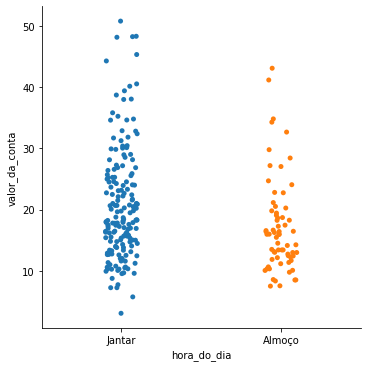

In [42]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=dados)
plt.show()

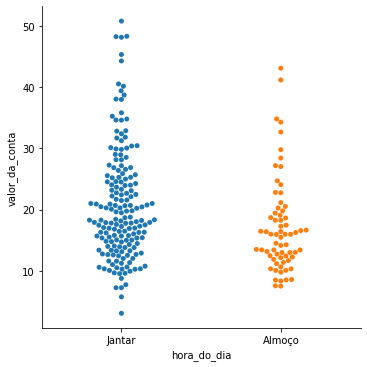

In [43]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=dados, kind='swarm')
plt.show()

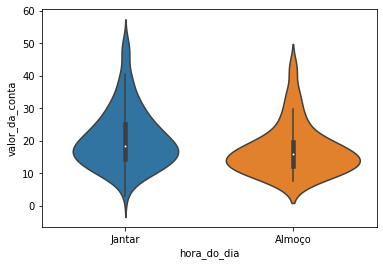

In [44]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=dados)
plt.show()

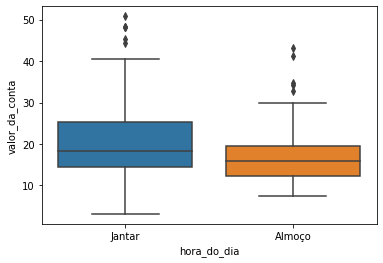

In [45]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=dados)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


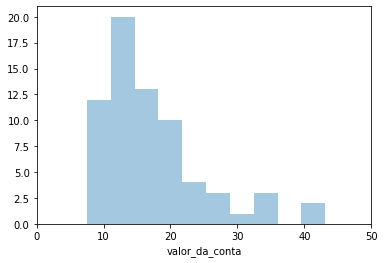

In [55]:
almoco = dados.query('hora_do_dia=="Almoço"')['valor_da_conta']
ax = sns.distplot(almoco, kde=False)
plt.xlim(0, 50)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


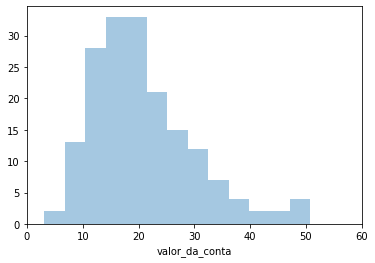

In [56]:
jantar = dados.query('hora_do_dia=="Jantar"')['valor_da_conta']
ax = sns.distplot(jantar, kde=False)
plt.xlim(0, 60)
plt.show()

### Diferenças entre almoço e jantar

**H<sup>0</sup>**: A distribuição do valor da conta do almoço é igual ao da conta do jantar

In [58]:
dados.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


In [59]:
ranksums(jantar, almoco)

RanksumsResult(statistic=3.2438872807262955, pvalue=0.0011791039723641672)

A distribuição do valor da conta do almoço não é igual ao da conta do jantar. Ou seja, os dois grupos são diferentes.

**H<sup>0</sup>**: A distribuição da taxa da gorjeta é igual no almoço e no jantar.

In [63]:
porcentagem_almoco = dados.query('hora_do_dia=="Almoço"')['porcentagem']
porcentagem_jantar = dados.query('hora_do_dia=="Jantar"')['porcentagem']

ranksums(porcentagem_almoco, porcentagem_jantar)

RanksumsResult(statistic=1.1258018532735787, pvalue=0.2602493995587126)

A distribuição da taxa da gorjeta é igual no almoço e no jantar.